Calculating the Hausdorff distances...
	diameter = 1.0E-01, distance = 5.98E+06
	diameter = 1.0E-02, distance = 5.98E+05
	diameter = 1.0E-03, distance = 5.98E+04
	diameter = 1.0E-04, distance = 5.98E+03
Done!


Convergence Order:0.9999999997098576 prefactor K:59820641.17057849


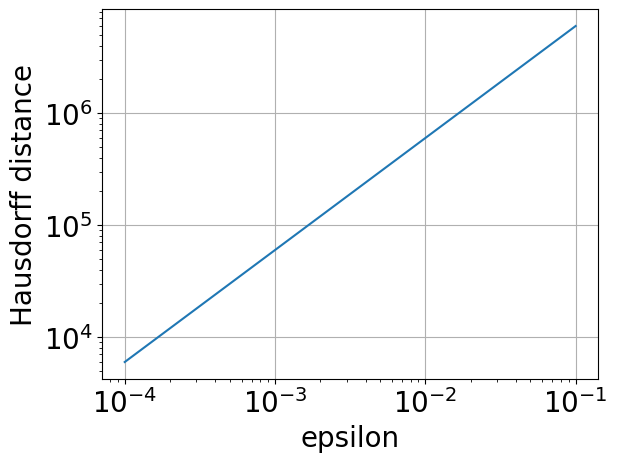

FLECCS executed


In [1]:
from graphing.helper import convergence_analysis
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
fleccs_obj = -4.946928843629e+08  # Replace with actual value
fleccs_sol = {'x_sorbent_total': 0.7571021770410511,'x_air_adsorb_max': 0.7567643358197031} 
fleccs_y_bound = {'x_sorbent_total': [0.0, 1.0],"x_air_adsorb_max": [0.0, 1.0]}
n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="baron")
convergence_analysis(alg,fleccs_sol,fleccs_obj,start=-4,stop=-1,steps=4,name="FLECCS")
print("FLECCS executed")